# Fashion MNIST
#### El conjunto de datos Fashion MNIST es una alternativa moderna al clásico MNIST, diseñada para representar imágenes de artículos de moda en lugar de dígitos escritos a mano.

#### Este dataset es utilizado para probar modelos de clasificación de imágenes con redes neuronales. Contiene:
#### - 60,000 imágenes de entrenamiento y 10,000 imágenes de prueba.
#### - Cada imagen es en escala de grises de 28 × 28 píxeles.
#### - 10 clases, representando distintos tipos de ropa y accesorios.

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, classification_report

## Cargar el Dataset Fashion MNIST

In [5]:
# Cargar Fashion MNIST desde Keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Mostrar dimensiones de los datos
print(f"Dimensiones de x_train: {x_train.shape}")  # (60000, 28, 28)
print(f"Dimensiones de x_test: {x_test.shape}")    # (10000, 28, 28)


Dimensiones de x_train: (60000, 28, 28)
Dimensiones de x_test: (10000, 28, 28)


## Visualizar Algunas Imágenes del Dataset

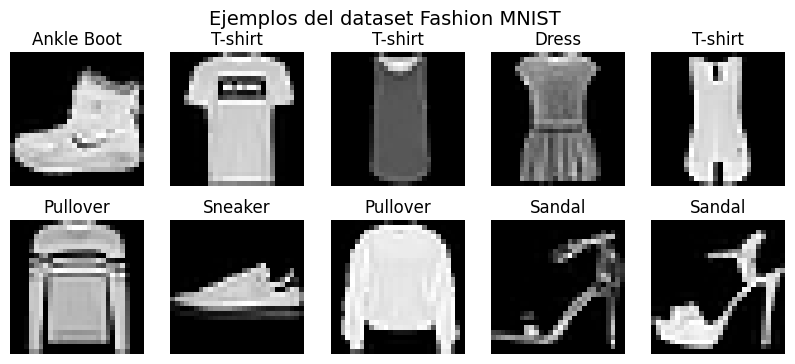

In [6]:
# Definir nombres de las clases
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Mostrar algunas imágenes de Fashion MNIST
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.suptitle("Ejemplos del dataset Fashion MNIST", fontsize=14)
plt.show()


## Visualizar la Distribución de Clases

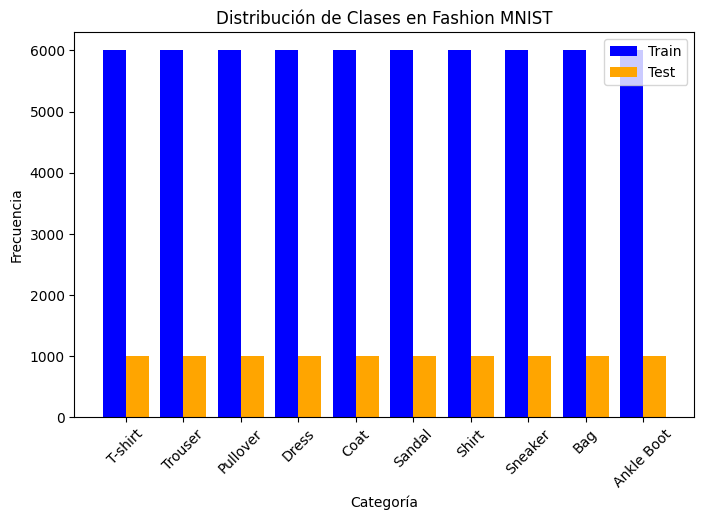

In [7]:
# Contar elementos por clase en los conjuntos de entrenamiento y prueba
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(unique_train - 0.2, counts_train, width=0.4, label="Train", color="blue")
ax.bar(unique_test + 0.2, counts_test, width=0.4, label="Test", color="orange")

# Personalizar gráfico
ax.set_xticks(unique_train)
ax.set_xticklabels(class_names, rotation=45)
ax.legend()
plt.title("Distribución de Clases en Fashion MNIST")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.show()


## Preprocesamiento de Datos

In [8]:
# Normalizar los valores de los píxeles al rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## Definir y entrenar el Modelo de Red Neuronal

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convertir imagen en un vector
    keras.layers.Dense(128, activation="relu"),  # Capa oculta con 128 neuronas
    keras.layers.Dropout(0.2),  # Regularización para evitar sobreajuste
    keras.layers.Dense(10, activation="softmax")  # Capa de salida con 10 clases
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

start = time.time()

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

finish = time.time()
print(f"\nTiempo de entrenamiento: {finish - start:.2f} segundos")

Epoch 1/10


/home/gustavo/.virtualenvs/tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.7645 - loss: 0.6754 - val_accuracy: 0.8494 - val_loss: 0.4185
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.8518 - loss: 0.4104 - val_accuracy: 0.8593 - val_loss: 0.3942
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.8645 - loss: 0.3709 - val_accuracy: 0.8648 - val_loss: 0.3693
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8736 - loss: 0.3449 - val_accuracy: 0.8672 - val_loss: 0.3704
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8779 - loss: 0.3353 - val_accuracy: 0.8678 - val_loss: 0.3709
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8823 - loss: 0.3186 - val_accuracy: 0.8681 - val_loss: 0.3592
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.8869 - loss: 0.3051 - val_accuracy: 0.8737 - val_loss: 0.3511
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.8909 - loss: 0.29

## Evaluar el modelo

313/313 - 0s - 641us/step - accuracy: 0.8814 - loss: 0.3391

Precisión en el conjunto de prueba: 0.8814
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


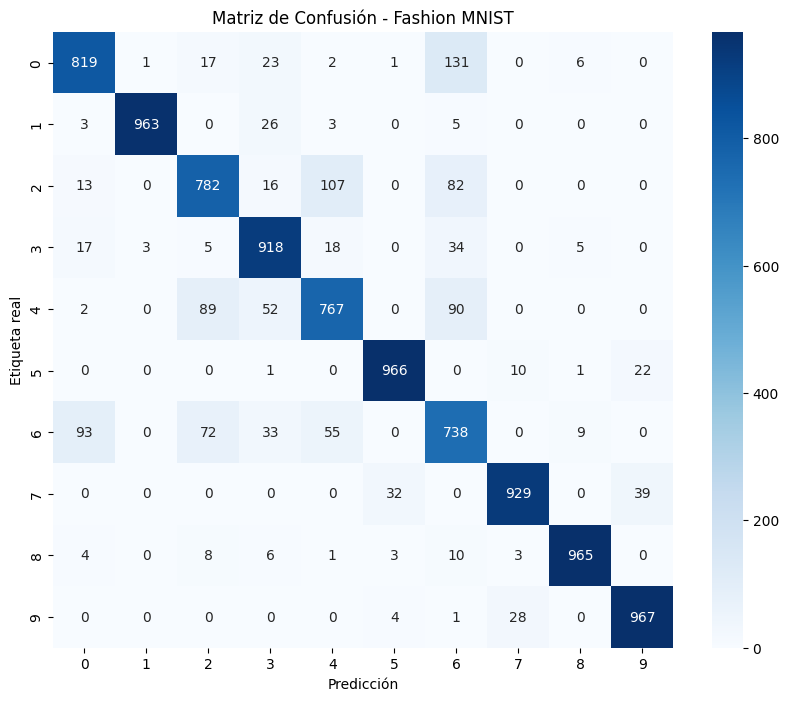

In [10]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

# Obtener predicciones
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - Fashion MNIST")
plt.show()
